In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import cv2
from PIL import Image,ImageOps,ImageDraw
from math import sin,cos,pi
import imgaug.augmenters as iaa

In [2]:
df_names_m = pd.read_csv("Names_Surnames/names_male.csv")
df_names_f = pd.read_csv("Names_Surnames/names_female.csv")

[]

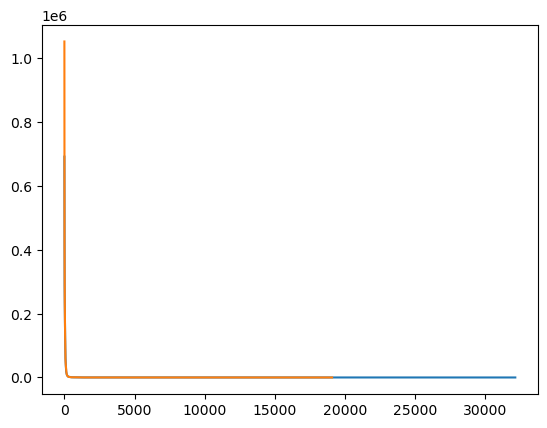

In [3]:
plt.plot(df_names_m["LICZBA WYSTĄPIEŃ"])
plt.plot(df_names_f["LICZBA_WYSTĄPIEŃ"])
plt.plot()

[]

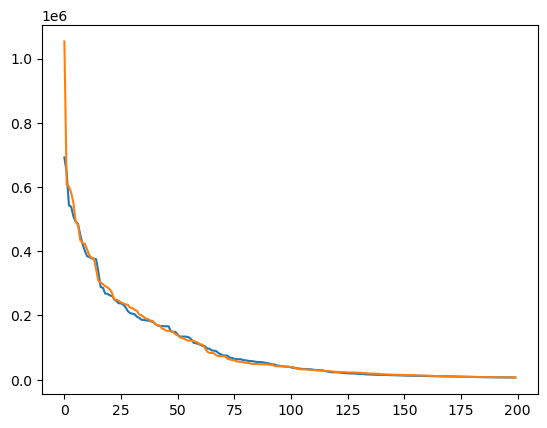

In [4]:
plt.plot(df_names_m["LICZBA WYSTĄPIEŃ"].iloc[:200])
plt.plot(df_names_f["LICZBA_WYSTĄPIEŃ"].iloc[:200])
plt.plot()

In [5]:
df_surname_m = pd.read_csv("Names_Surnames/surnames_male.csv")
df_surname_f = pd.read_csv("Names_Surnames/surnames_female.csv")

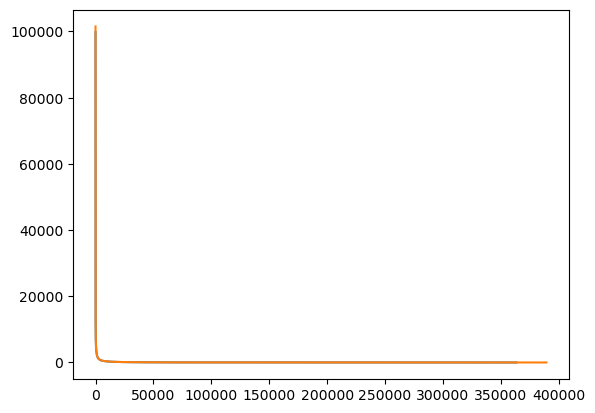

In [6]:
plt.plot(df_surname_m["Liczba"])
plt.plot(df_surname_f["Liczba"])

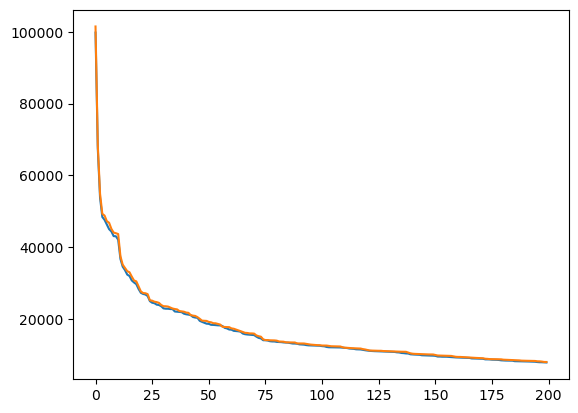

In [7]:
plt.plot(df_surname_m["Liczba"].iloc[:200])
plt.plot(df_surname_f["Liczba"].iloc[:200])

In [8]:
df_surname_m = df_surname_m.iloc[:200]
df_surname_f = df_surname_f.iloc[:200]
df_names_m = df_names_m.iloc[:200]
df_names_f = df_names_f.iloc[:200]

In [9]:
def get_full_name():
    gender = random.randint(0,1)
    if gender == 0:
        return df_names_f.iloc[random.randint(0,199),0],df_surname_f.iloc[random.randint(0,199),0]
    else:
        return df_names_m.iloc[random.randint(0,199),0],df_surname_m.iloc[random.randint(0,199),0]

In [10]:
for i in range(10):
    name,surname = get_full_name()
    print(name,surname)

KOSTIANTYN KLIMEK
MAKSYMILIAN RATAJCZAK
WOJCIECH WŁODARCZYK
BOLESŁAW KACZMAREK
ZDZISŁAW NOWICKI
IZABELA KOZAK
ARKADIUSZ NOWACKI
LENA BEDNARCZYK
VIKTORIIA ŁUCZAK
OLEKSII KĘDZIERSKI


Data source: https://cs.pollub.pl/phcd/

In [11]:
pol_letters = {"pol_a":"ą","pol_c":"ć","pol_e":"ę","pol_l":"ł","pol_n":"ń","pol_o":"ó","pol_s":"ś","pol_z1":"ź","pol_z2":"ż"}

In [12]:
upper_case = {}
for filename in os.listdir("Polish_handwriting/Upper_case"):
    key = filename
    if filename in pol_letters:
        key = pol_letters[filename]
    upper_case[key] = []
    print(key)
    for pic_file in os.listdir("Polish_handwriting/Upper_case/" + filename):
        pic = cv2.imread("Polish_handwriting/Upper_case/" + filename + "/" + pic_file, cv2.IMREAD_GRAYSCALE)
        upper_case[key].append(pic)

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
ą
ć
ę
ł
ń
ó
ś
ź
ż
q
r
s
t
u
v
w
x
y
z


In [13]:
lower_case = {}
for filename in os.listdir("Polish_handwriting/Lower_case"):
    key = filename
    if filename in pol_letters:
        key = pol_letters[filename]
    lower_case[key] = []
    print(key)
    for pic_file in os.listdir("Polish_handwriting/Lower_case/" + filename):
        pic = cv2.imread("Polish_handwriting/Lower_case/" + filename + "/" + pic_file, cv2.IMREAD_GRAYSCALE)
        lower_case[key].append(pic)



a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
ą
ć
ę
ł
ń
ó
ś
ź
ż
q
r
s
t
u
v
w
x
y
z


In [14]:
def draw_boxes(img, boxes):
    height = np.array(img).shape[0]
    for box in boxes:
        #print(box[1])
#         points = np.array(((box[0],height-box[1][1]),(box[1][2],height-box[1][1]),
#                            (box[1][2],height-box[1][3]),(box[1][2],height-box[1][3]),(box[1][0],height-box[1][3])))
        points = np.array(box)
        img = cv2.polylines(np.array(img), [points], isClosed=True, color=(0,0,0), thickness=1)
        
        #print(points)
    plt.figure(figsize=(100,100))
    plt.imshow(img,cmap='gray')

In [15]:
def string_to_img():
    
    words = get_full_name()
    img = []
    box = []
    current = 0
    #print(words)
    max_height = 32*4
    for word in words:
        y1 = int((max_height-32)/2)
        y2 = int((max_height-32)/2) +32
        x1= 32+current
        x2= x1 + len(word)*32
        box.append([[x1,y1],[x2,y1],[x2,y2],[x1,y2]])
        current += x2
        first_letter = True
        word = word.lower()
        img.append(np.ones((32,32))*255)
        for char in word:
            
            if first_letter:
                index = random.randint(0, len(upper_case[char])-1)
                img.append(upper_case[char][index])
                first_letter = False
            else:
                index = random.randint(0, len(lower_case[char])-1)
                img.append(lower_case[char][index])
    size = len(img)
    total_width = (size+1)*32
     
    
    merged_image = Image.new('L', (total_width, max_height),( 255))

    for j in range(size):
            merged_image.paste(Image.fromarray(img[j]),(j*32,int((max_height-32)/2)))

    name_img = np.array(merged_image)[box[0][0][1]:box[0][2][1],box[0][0][0]:box[0][2][0]]
    surname_img = np.array(merged_image)[box[1][0][1]:box[1][2][1],box[1][0][0]:box[1][2][0]]
    return merged_image,box,words,name_img,surname_img

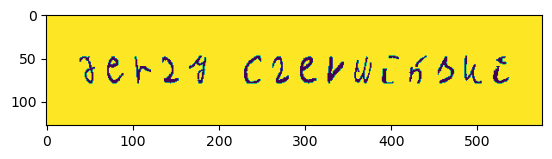

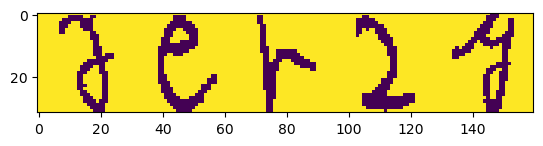

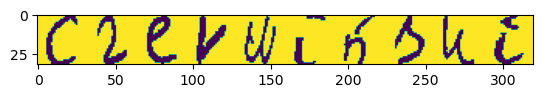

('JERZY', 'CZERWIŃSKI')


In [16]:
canvas,box,words,name,surname = string_to_img()
plt.imshow(canvas)
plt.show()
plt.imshow(name)
plt.show()
plt.imshow(surname)
plt.show()
print(words)

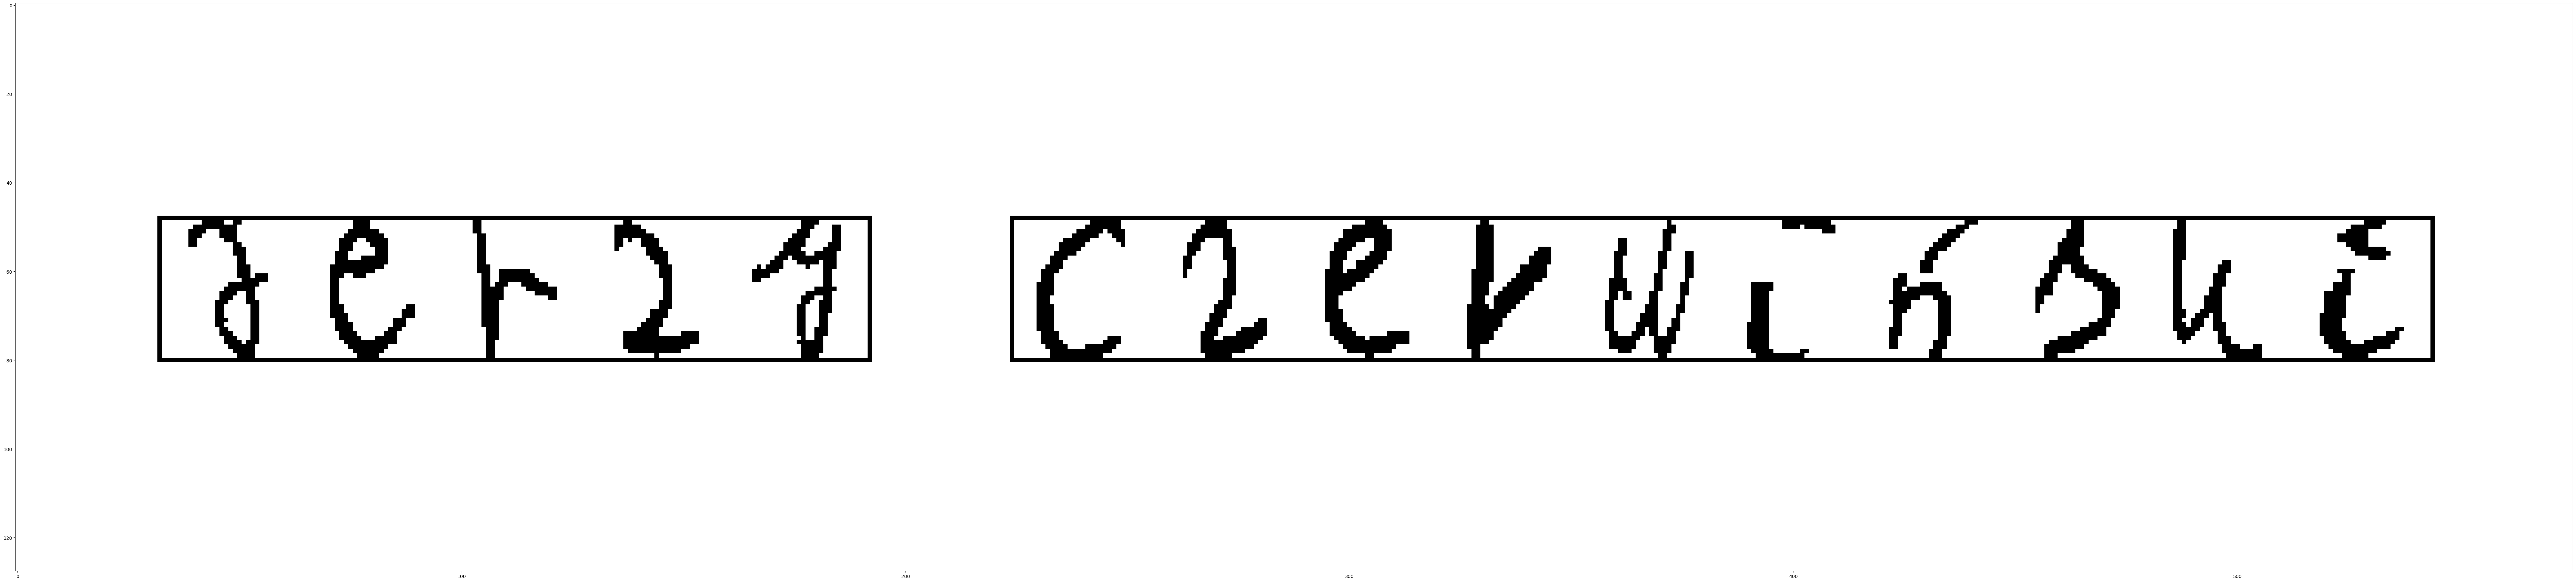

In [17]:
draw_boxes(canvas,box)

In [18]:
def vector_cenralisation(boxes,shape):
    x_center = int(shape[1]/2)
    y_center = int(shape[0]/2)
    for i in range(len(boxes)):
        for j in range(len(boxes[i])):
            boxes[i][j][0] =  boxes[i][j][0] - x_center
            boxes[i][j][1] =  y_center -  boxes[i][j][1] 
    return boxes

In [19]:
def vector_rotation(boxes,angle):
    angle = angle/180 *pi
    for i in range(len(boxes)):
        for j in range(len(boxes[i])):
            boxes[i][j][0] = cos(angle)*boxes[i][j][0] - sin(angle)*boxes[i][j][1]
            boxes[i][j][1] = sin(angle)*boxes[i][j][0] + cos(angle)*boxes[i][j][1]
    return boxes

In [20]:
def vector_decenralisation(boxes,shape):
    x_center = int(shape[1]/2)
    y_center = int(shape[0]/2)
    for i in range(len(boxes)):
        for j in range(len(boxes[i])):
            boxes[i][j][0] =  int(boxes[i][j][0] + x_center)
            boxes[i][j][1] =  int(y_center -  boxes[i][j][1])
    return boxes

In [21]:
def get_img_box():
    canvas,box,text,img_name,img_surname = string_to_img()
    shape = np.array(canvas).shape
    angle = random.uniform(-10, 10)
    box = vector_cenralisation(box,shape)
    box = vector_rotation(box,angle)
    box = vector_decenralisation(box,shape)
    canvas = canvas.rotate(angle,fillcolor="white")
    return canvas,box,text,img_name,img_surname
    

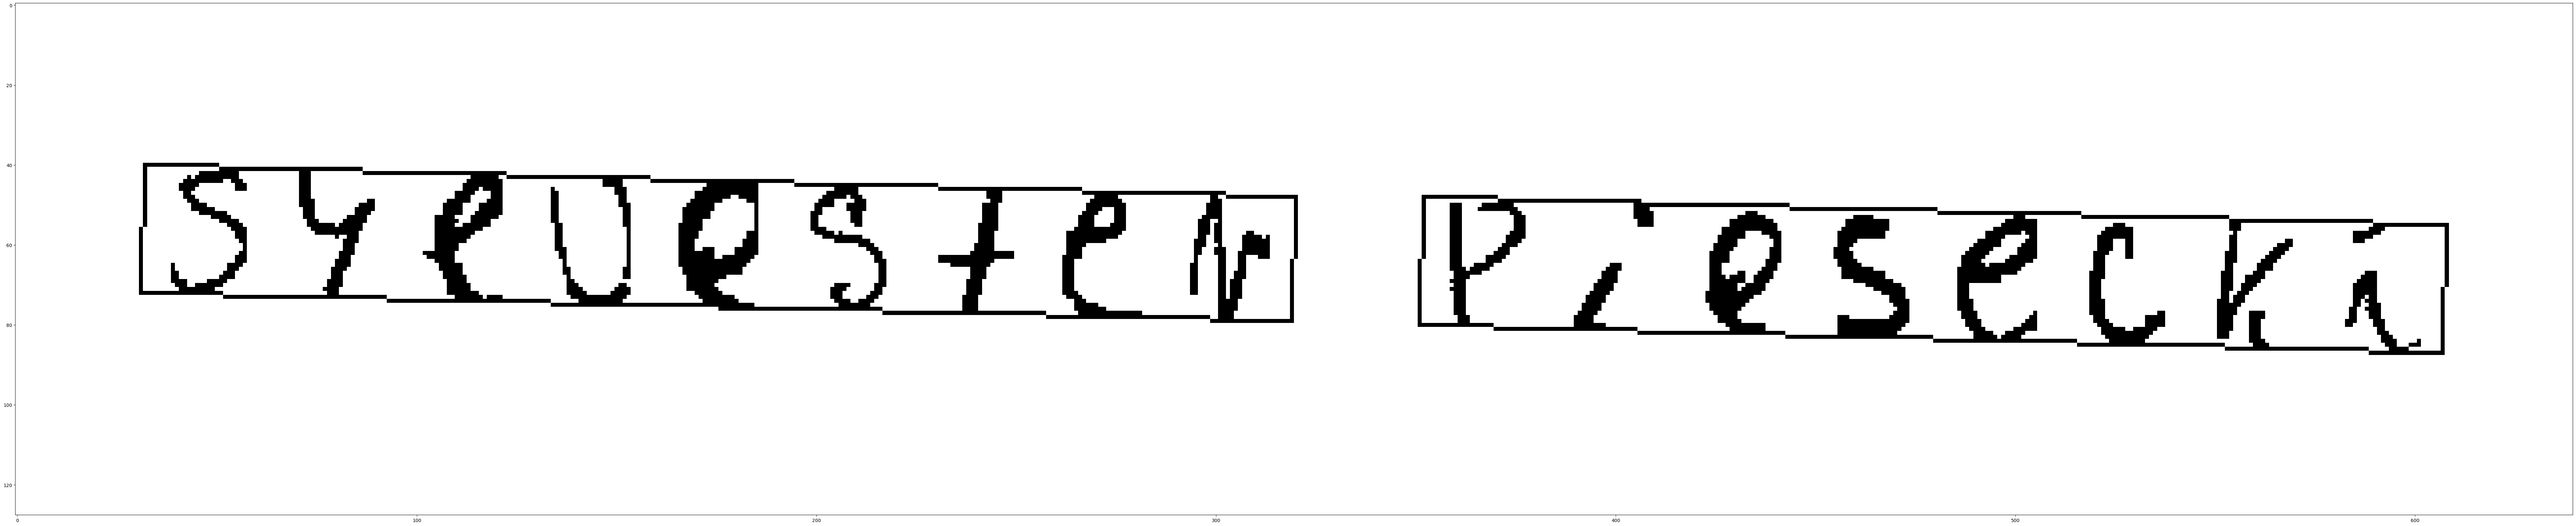

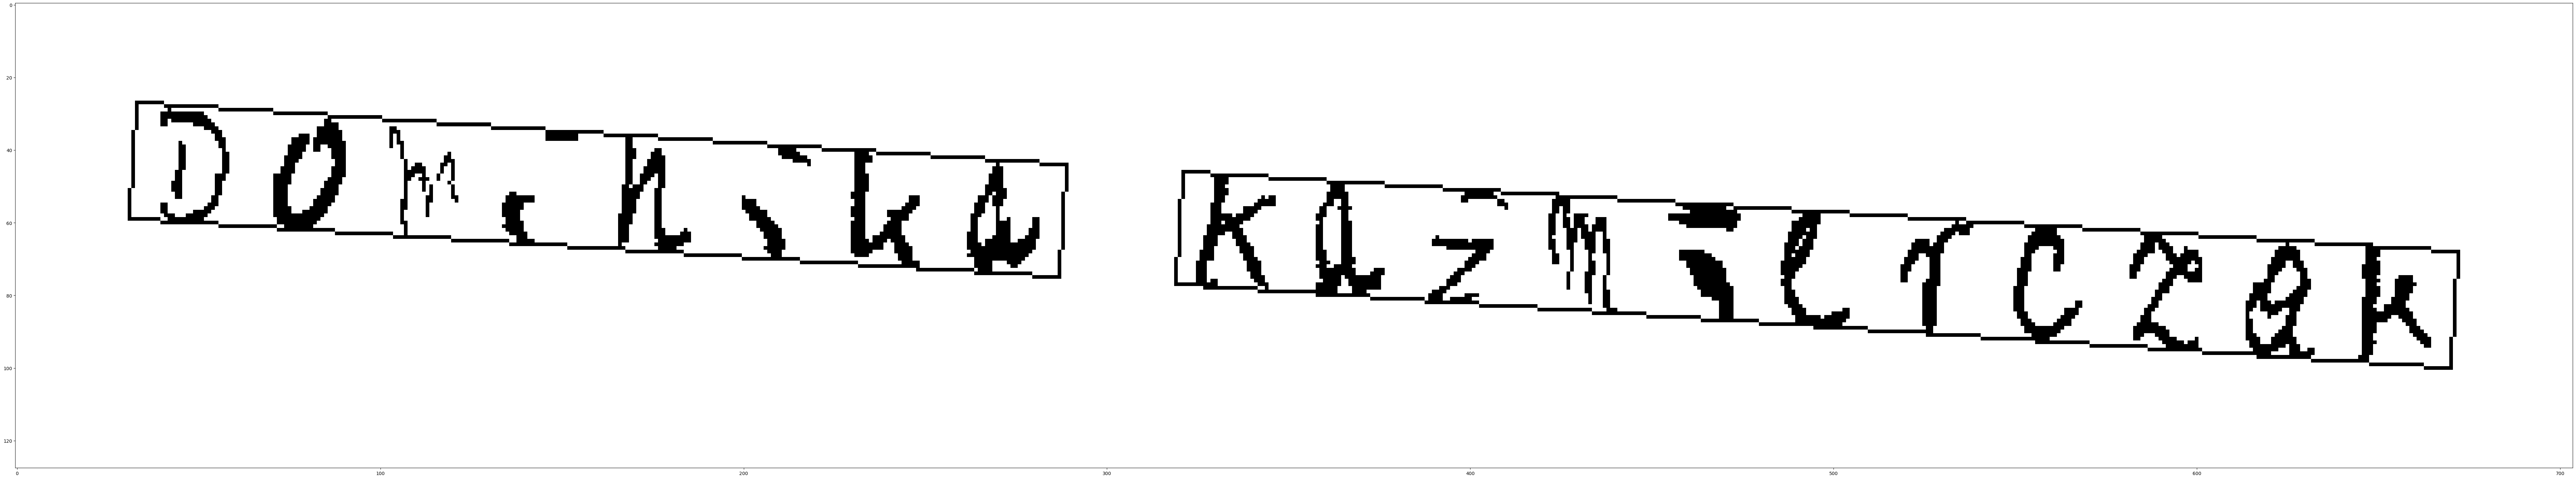

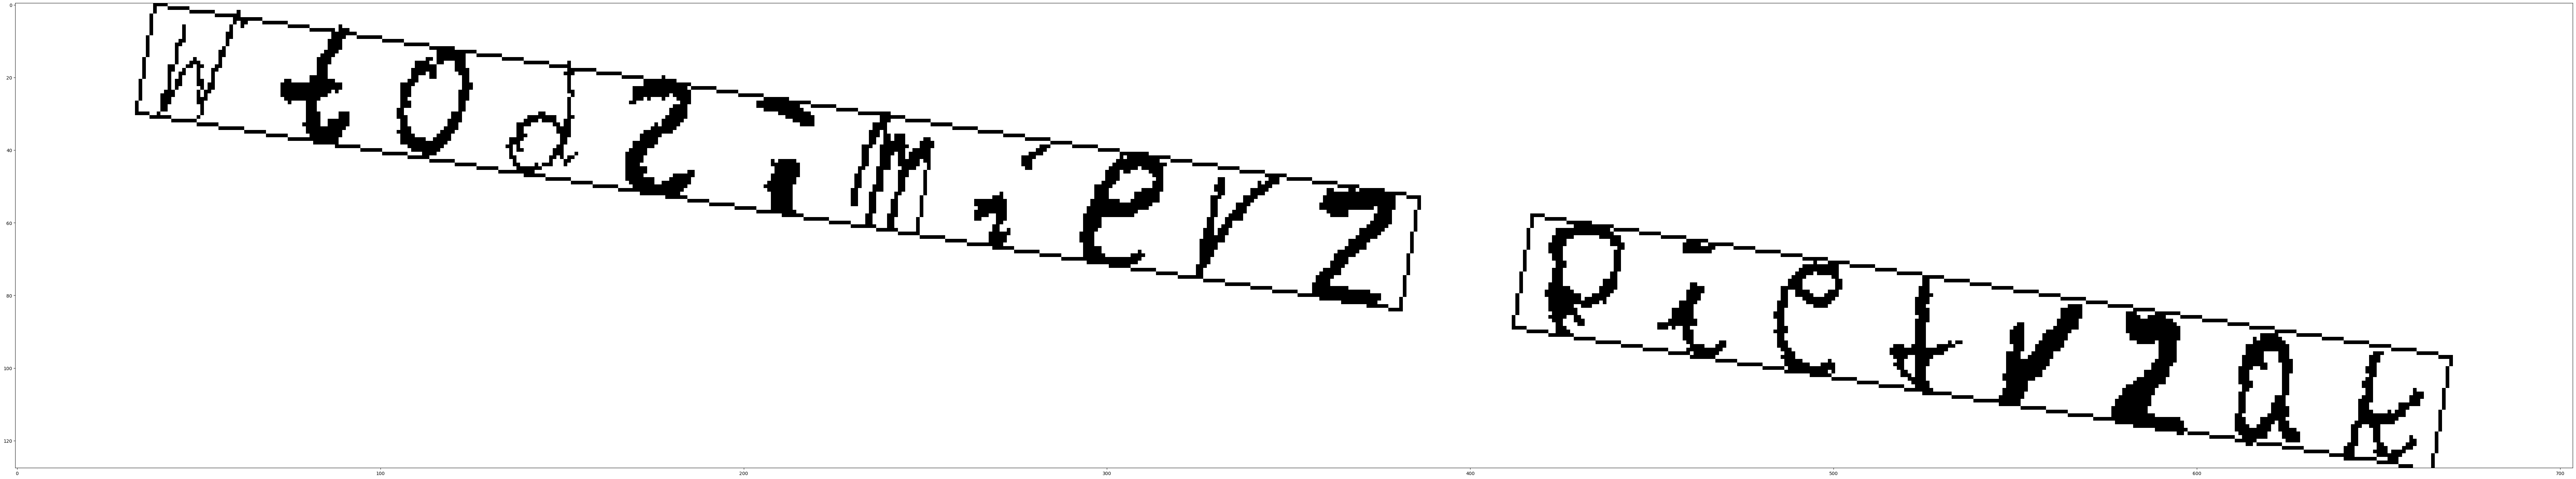

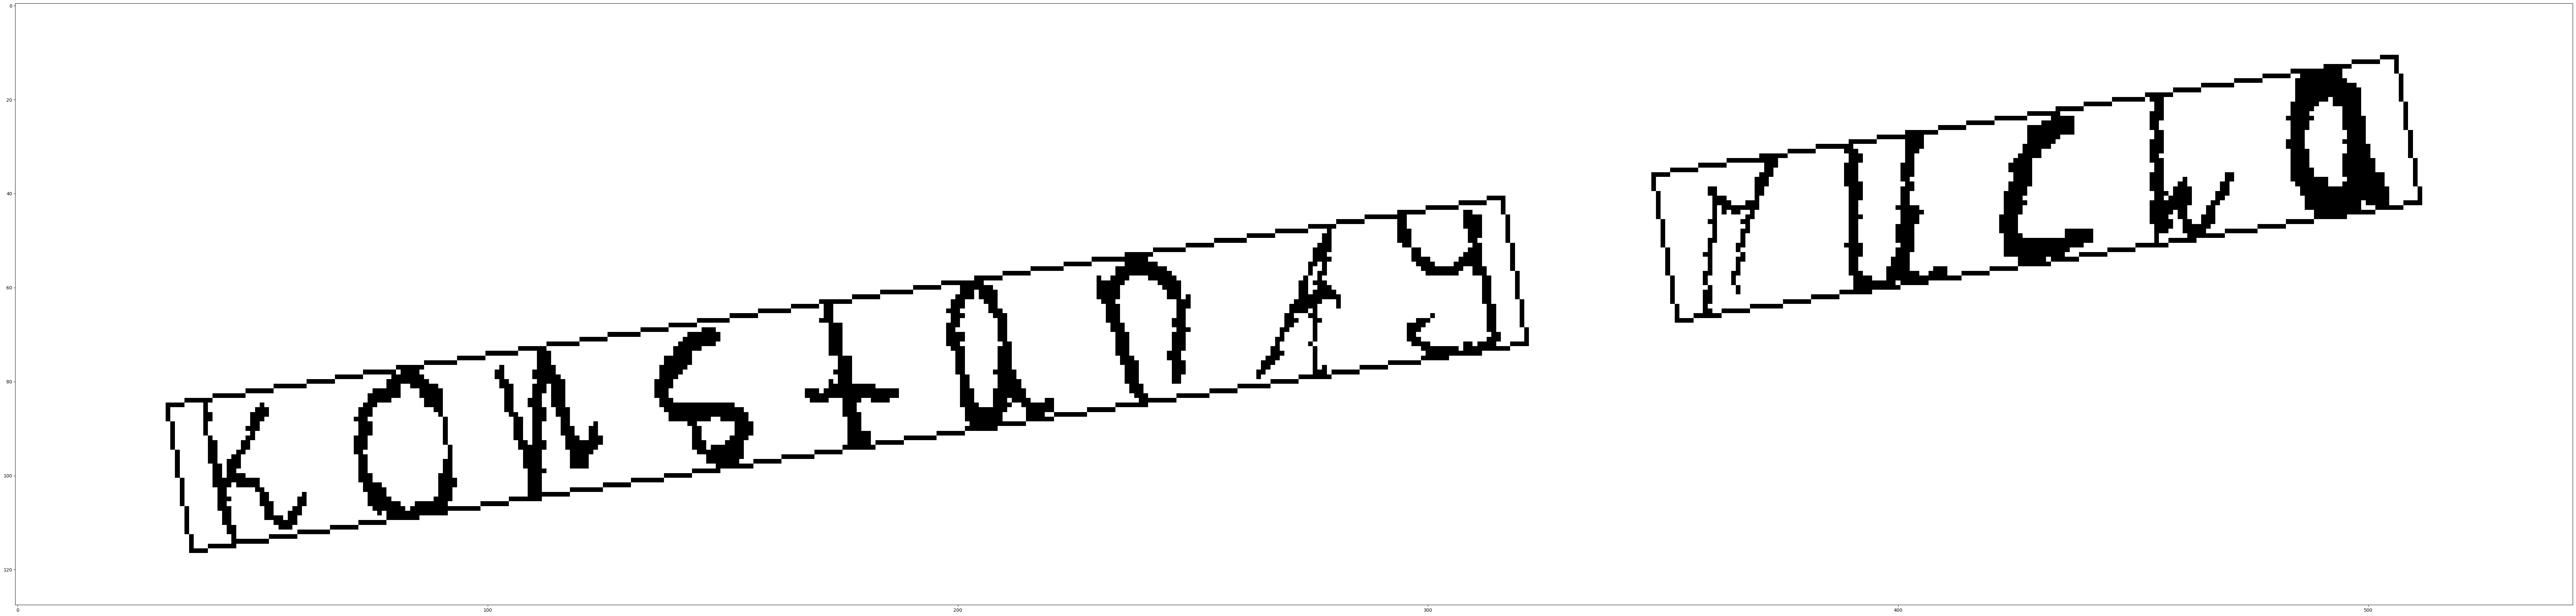

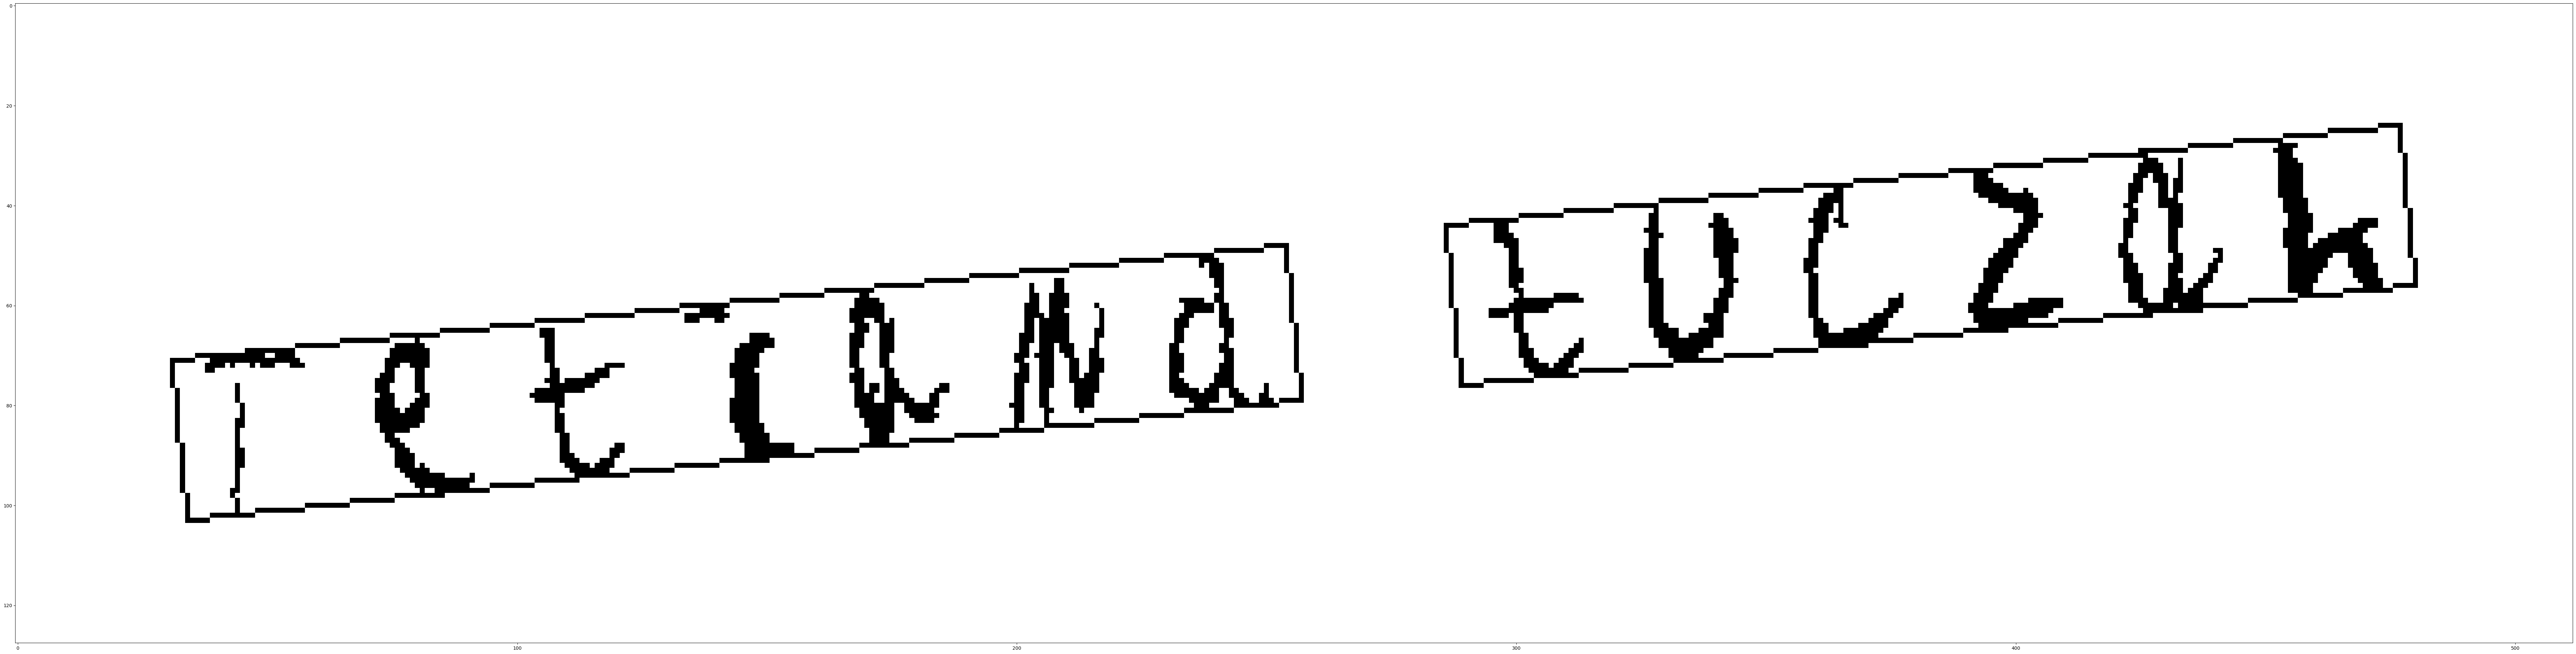

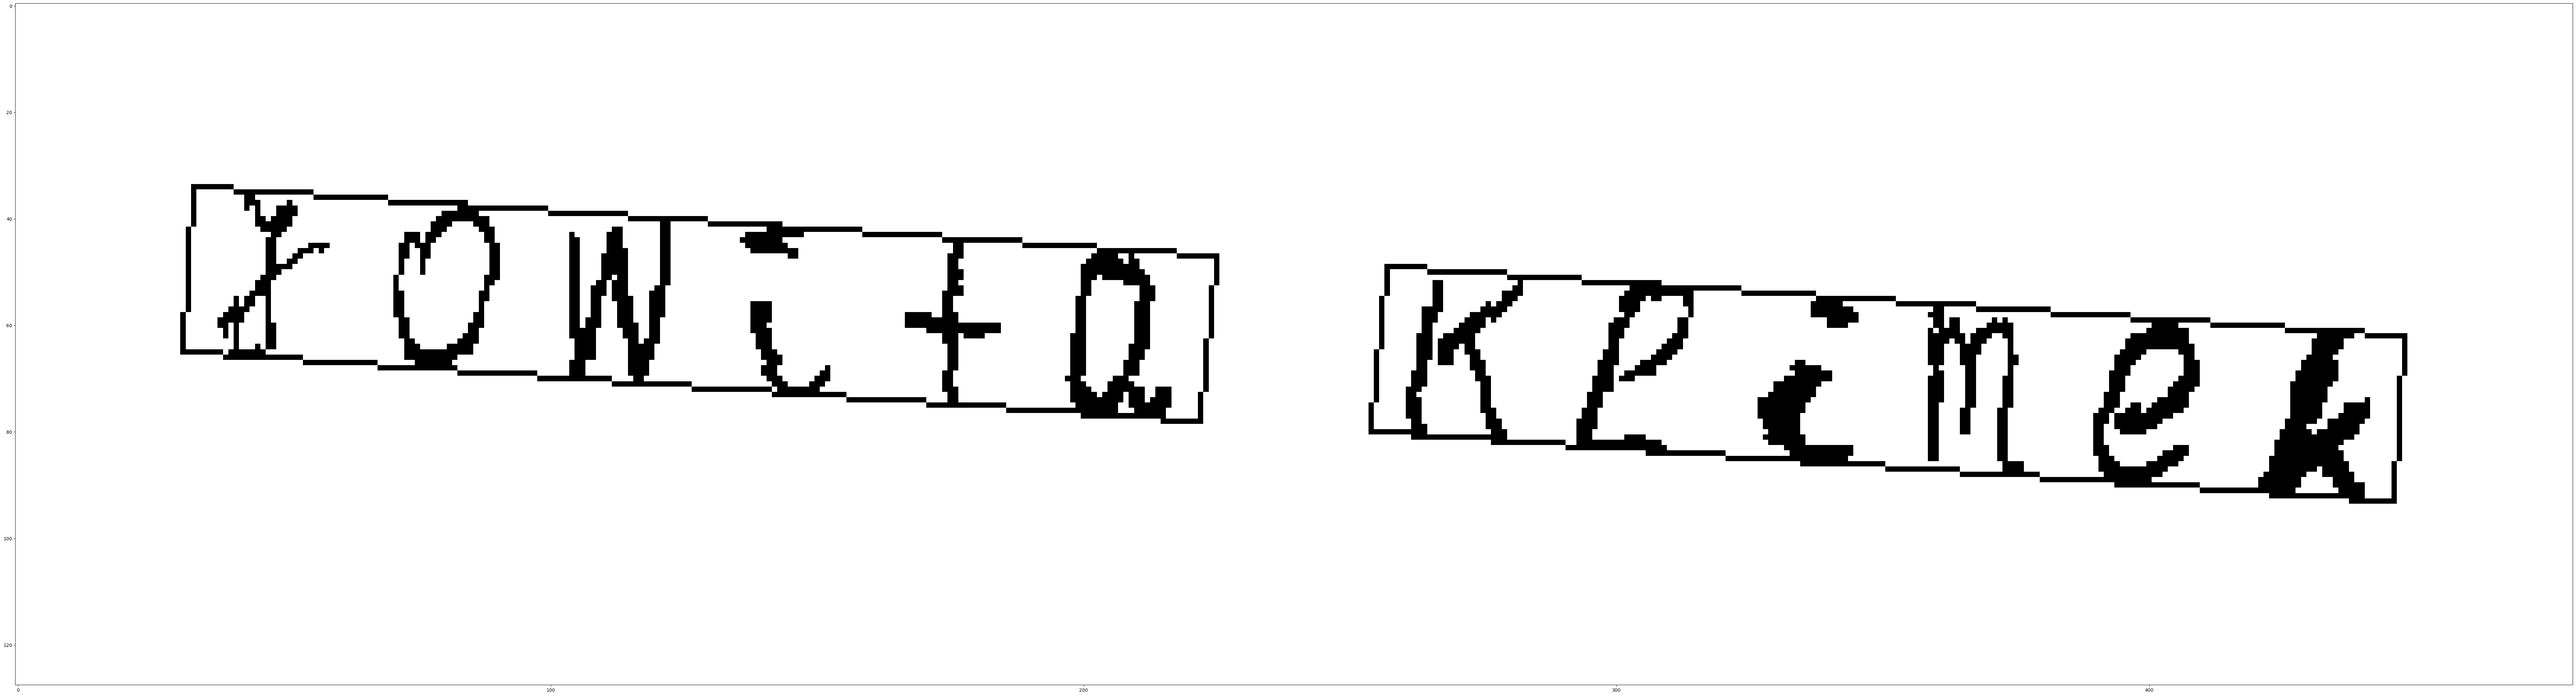

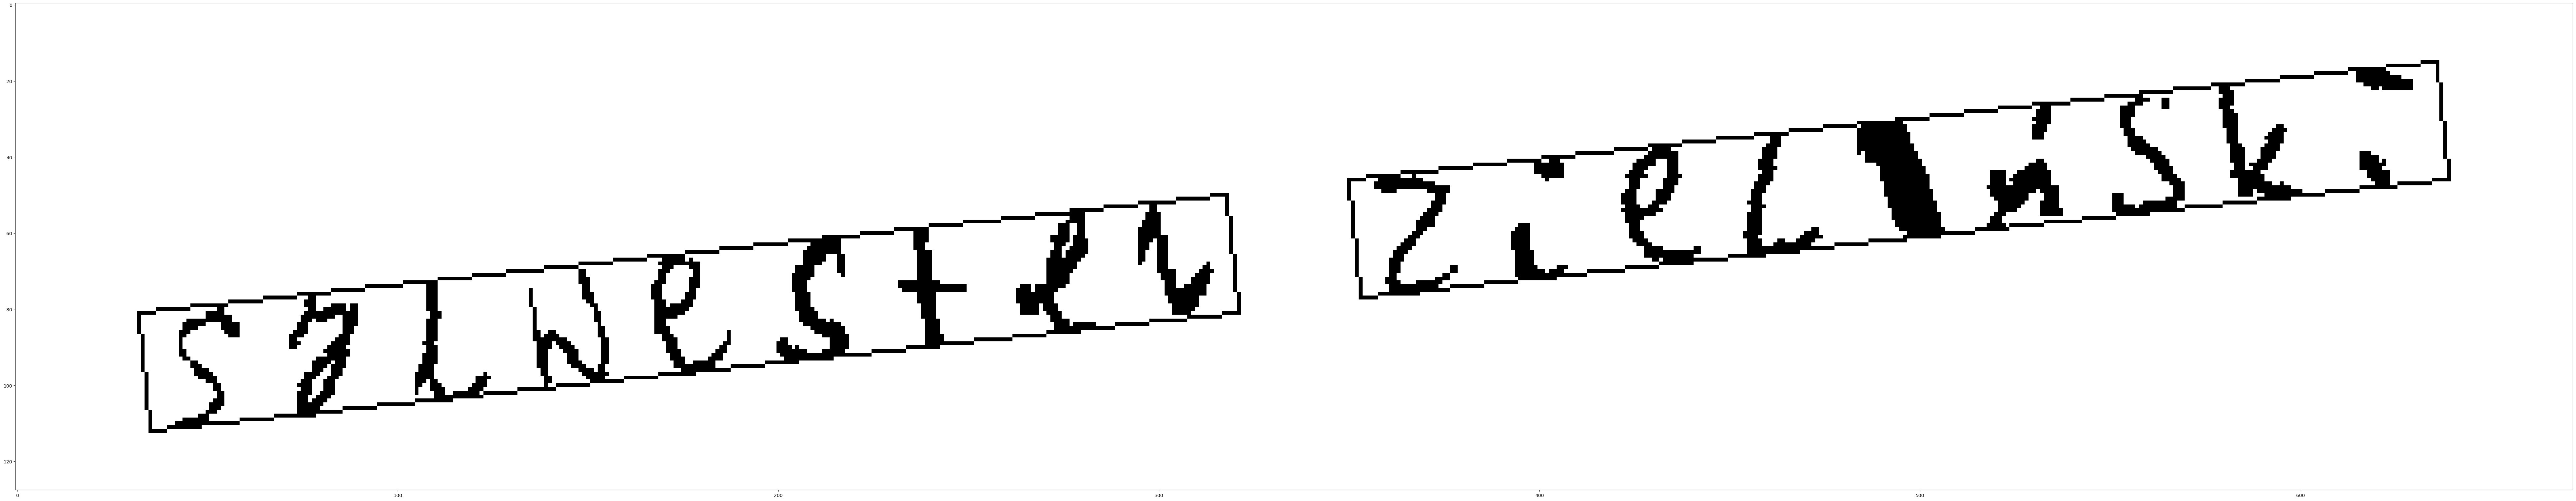

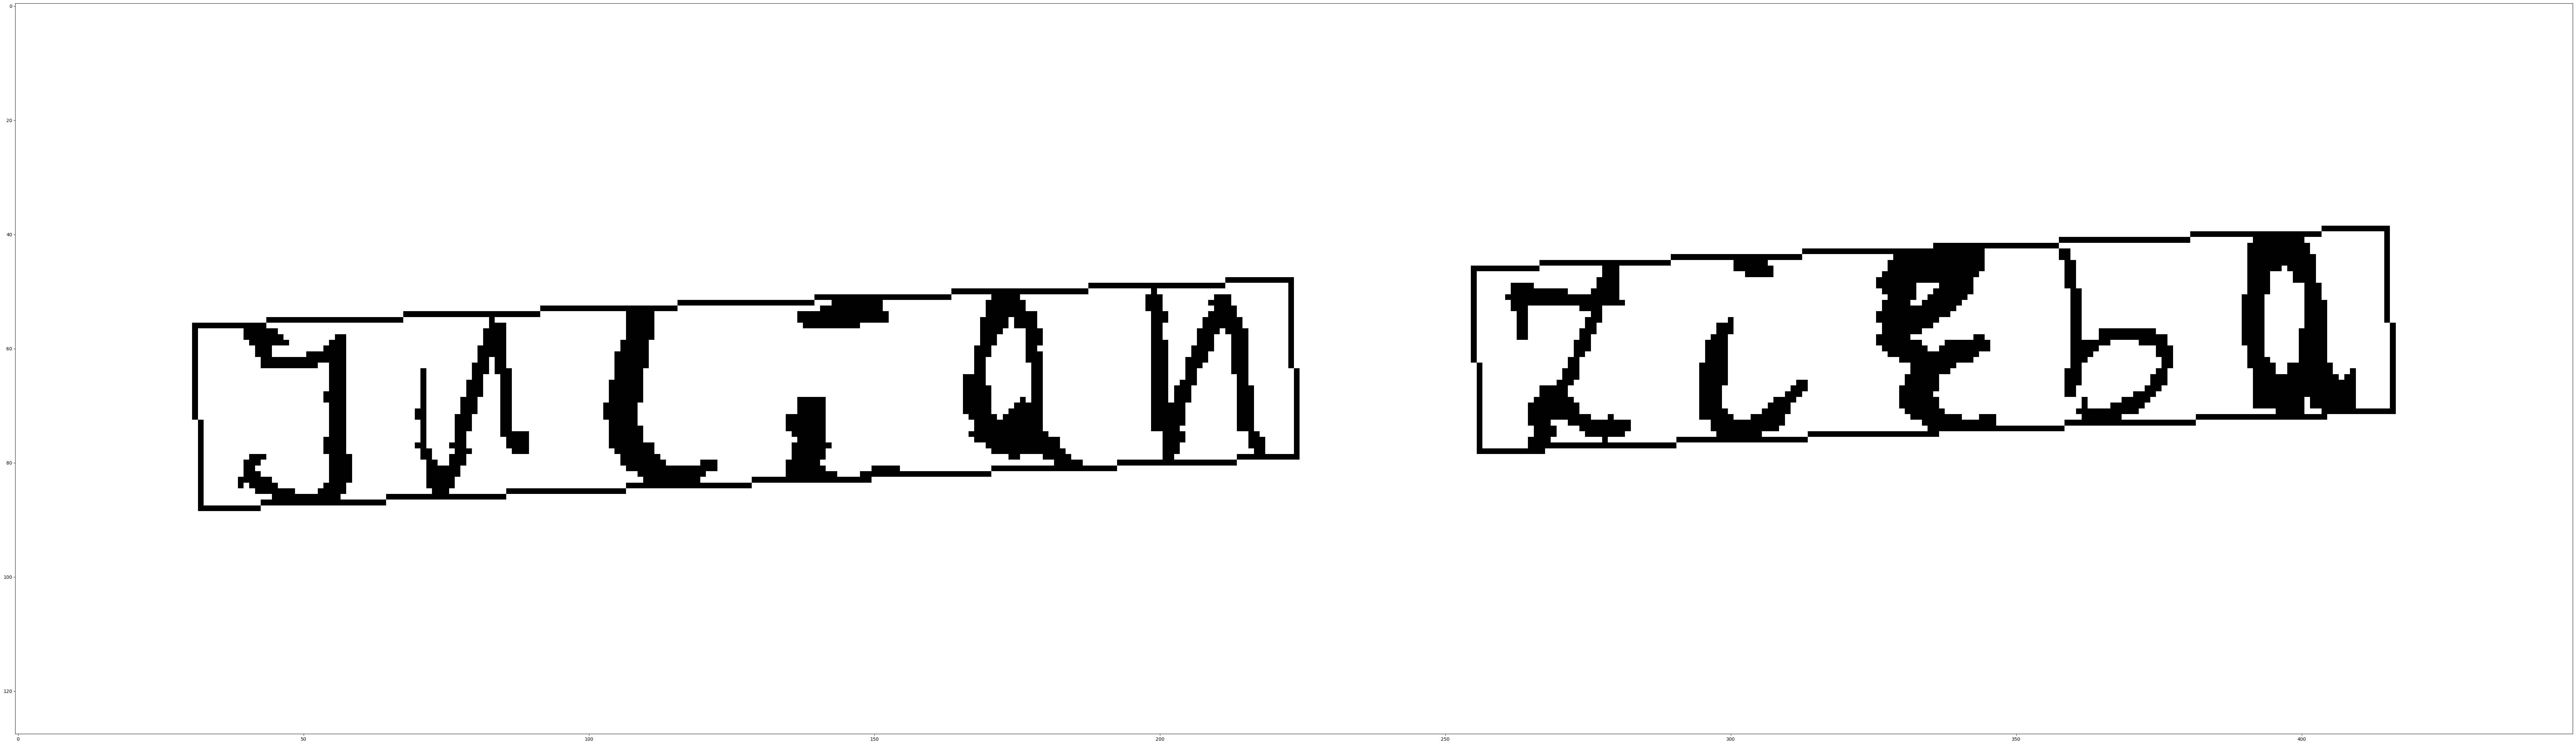

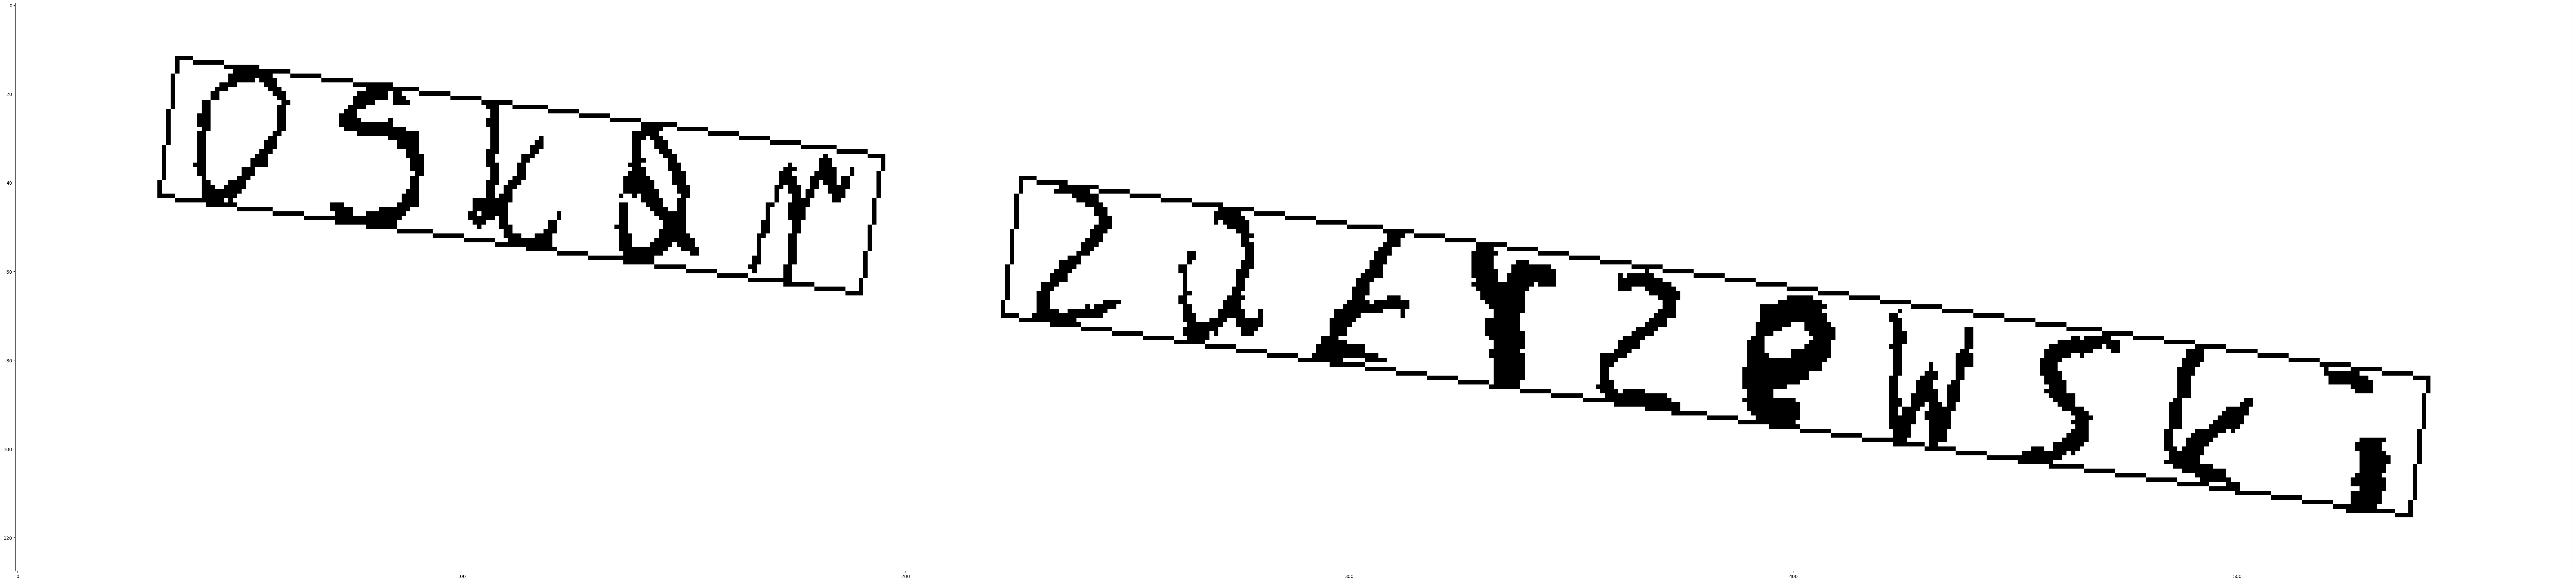

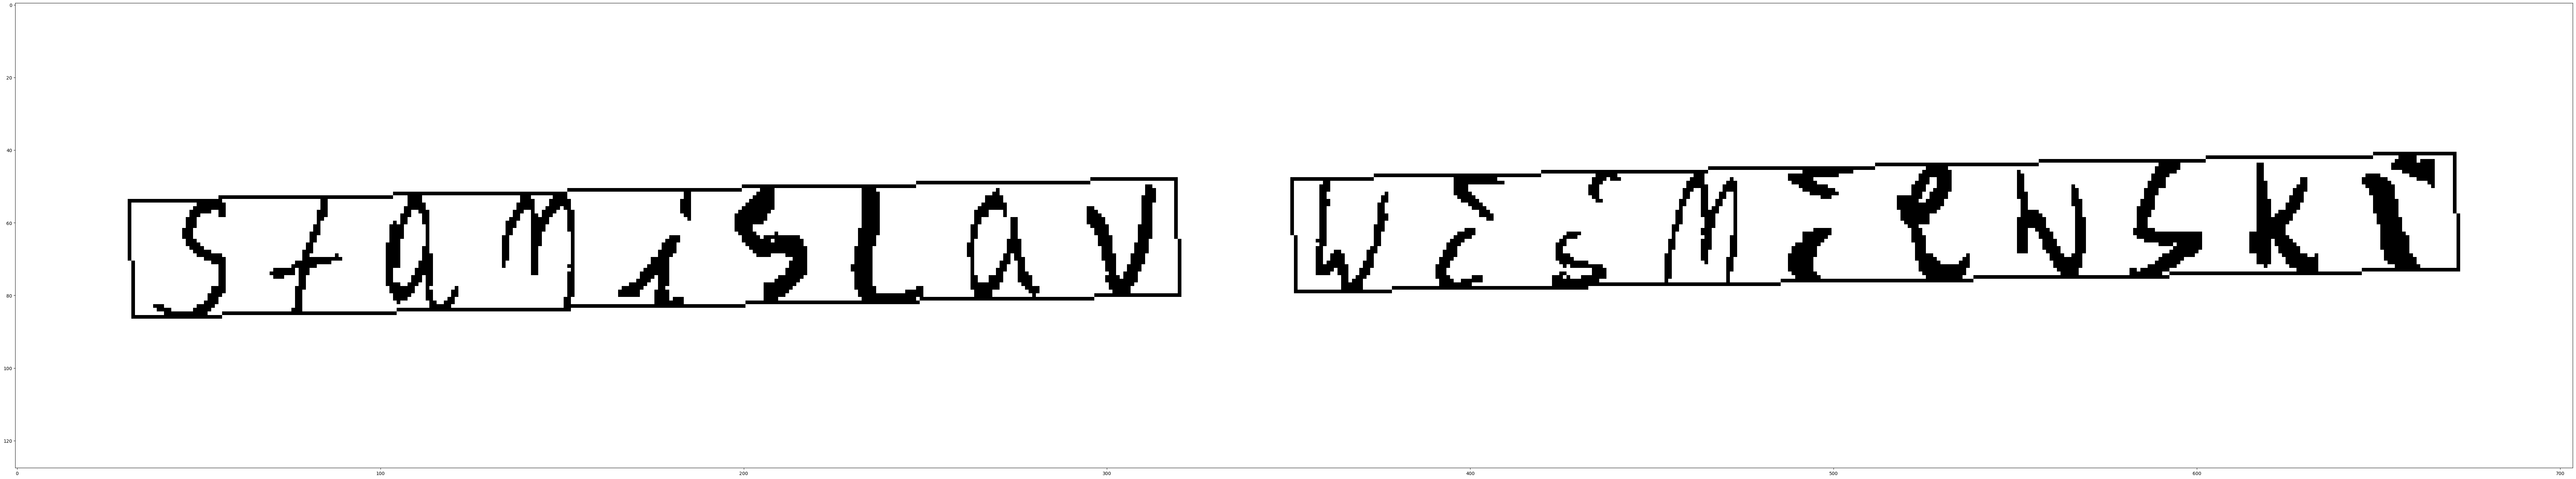

In [22]:
for i in range(10):
    try:
        canvas,box,text,img_name,img_surname = get_img_box()
        draw_boxes(canvas,box)
    except:
        pass
    

In [23]:
train_size=10000
test_size = 1000
validation_size =1000

In [24]:
df_train = pd.DataFrame(columns = ["Img_path","Name","Name_box","Surname","Surname_box","Img_path_name","Img_path_surname"])
i=0
while(i<train_size):
    try:
        canvas,box,text,img_name,img_surname = get_img_box()
        img_path = f'Training_data/signatures/img{i}.jpg'
        canvas.save(img_path)
        name_path = f'Training_data/names/img{i}.jpg'
        Image.fromarray(img_name).save(name_path)
        surname_path = f'Training_data/surnames/img{i}.jpg'
        Image.fromarray(img_surname).save(surname_path)
        new_row = pd.DataFrame([[img_path, text[0], box[0],text[1],box[1],name_path,surname_path]],
                                   columns = ["Img_path","Name","Name_box","Surname","Surname_box","Img_path_name","Img_path_surname"])
        df_train = pd.concat([df_train,new_row])
        i+=1
        if i%100==0:
            print(i)
    except:
        pass
df_train.to_csv("Training_data/data.csv")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [25]:
df_test = pd.DataFrame(columns = ["Img_path","Name","Name_box","Surname","Surname_box","Img_path_name","Img_path_surname"])
i=0
while(i<test_size):
    try:
        canvas,box,text,img_name,img_surname = get_img_box()
        img_path = f'Test_data/signatures/img{i}.jpg'
        canvas.save(img_path)
        name_path = f'Test_data/names/img{i}.jpg'
        Image.fromarray(img_name).save(name_path)
        surname_path = f'Test_data/surnames/img{i}.jpg'
        Image.fromarray(img_surname).save(surname_path)
        new_row = pd.DataFrame([[img_path, text[0], box[0],text[1],box[1],name_path,surname_path]],
                                   columns = ["Img_path","Name","Name_box","Surname","Surname_box","Img_path_name","Img_path_surname"])
        df_test = pd.concat([df_test,new_row])
        i+=1
        if i%100==0:
            print(i)
    except:
        pass
df_test.to_csv("Test_data/data.csv")

100
200
300
400
500
600
700
800
900
1000


In [26]:
df_valid = pd.DataFrame(columns = ["Img_path","Name","Name_box","Surname","Surname_box","Img_path_name","Img_path_surname"])
i=0
while(i<test_size):
    try:
        canvas,box,text,img_name,img_surname = get_img_box()
        img_path = f'Validation_data/signatures/img{i}.jpg'
        canvas.save(img_path)
        name_path = f'Validation_data/names/img{i}.jpg'
        Image.fromarray(img_name).save(name_path)
        surname_path = f'Validation_data/surnames/img{i}.jpg'
        Image.fromarray(img_surname).save(surname_path)
        new_row = pd.DataFrame([[img_path, text[0], box[0],text[1],box[1],name_path,surname_path]],
                                   columns = ["Img_path","Name","Name_box","Surname","Surname_box","Img_path_name","Img_path_surname"])
        df_valid = pd.concat([df_valid,new_row])
        i+=1
        if i%100==0:
            print(i)
    except:
        pass

df_valid.to_csv("Validation_data/data.csv")

100
200
300
400
500
600
700
800
900
1000


In [27]:
df_train

,Img_path,Name,Name_box,Surname,Surname_box,Img_path_name,Img_path_surname
0,Training_data/signatures/img0.jpg,ARKADIUSZ,"[[34, 23], [321, 45], [318, 77], [31, 54]]",ZAKRZEWSKI,"[[353, 48], [672, 73], [669, 104], [350, 79]]",Training_data/names/img0.jpg,Training_data/surnames/img0.jpg
0,Training_data/signatures/img1.jpg,KATARZYNA,"[[33, 31], [320, 48], [319, 79], [31, 63]]",OWCZAREK,"[[352, 49], [608, 64], [606, 96], [351, 81]]",Training_data/names/img1.jpg,Training_data/surnames/img1.jpg
0,Training_data/signatures/img2.jpg,DOROTA,"[[34, 30], [225, 45], [222, 77], [31, 61]]",ŁUKASIK,"[[257, 48], [480, 66], [477, 97], [254, 79]]",Training_data/names/img2.jpg,Training_data/surnames/img2.jpg
0,Training_data/signatures/img3.jpg,BORYS,"[[35, 18], [194, 37], [190, 68], [31, 49]]",WILCZYŃSKI,"[[226, 40], [544, 78], [540, 109], [222, 72]]",Training_data/names/img3.jpg,Training_data/surnames/img3.jpg
0,Training_data/signatures/img4.jpg,ANDRZEJ,"[[36, 16], [258, 44], [254, 75], [32, 47]]",KRAWCZYK,"[[290, 48], [543, 80], [539, 111], [285, 79]]",Training_data/names/img4.jpg,Training_data/surnames/img4.jpg
...,...,...,...,...,...,...,...
0,Training_data/signatures/img9995.jpg,OLGA,"[[37, 15], [163, 35], [158, 66], [32, 46]]",SZYMCZAK,"[[195, 40], [447, 81], [442, 112], [190, 71]]",Training_data/names/img9995.jpg,Training_data/surnames/img9995.jpg
0,Training_data/signatures/img9996.jpg,MIECZYSŁAWA,"[[32, 40], [384, 48], [383, 80], [31, 72]]",SZYMAŃSKA,"[[416, 49], [704, 55], [703, 87], [415, 81]]",Training_data/names/img9996.jpg,Training_data/surnames/img9996.jpg
0,Training_data/signatures/img9997.jpg,NATALIIA,"[[32, 38], [288, 47], [287, 78], [31, 70]]",WITKOWSKA,"[[320, 48], [608, 57], [607, 89], [319, 79]]",Training_data/names/img9997.jpg,Training_data/surnames/img9997.jpg
0,Training_data/signatures/img9998.jpg,MARTIN,"[[31, 54], [223, 48], [224, 80], [32, 86]]",ŚWIĄTEK,"[[255, 48], [479, 41], [480, 73], [256, 79]]",Training_data/names/img9998.jpg,Training_data/surnames/img9998.jpg
